<a href="https://colab.research.google.com/github/tuntul17/Others/blob/main/FIZ463hw2p2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from pylab import *
import numpy as np
from scipy.signal import find_peaks

In [56]:
h = 6.626e-34
c = 3.0e+8
k = 1.38e-23
Wdc = 0.058789e-14 #WiensDisplacementConstant

In [3]:
def BB(f,T):
  B = (2*h*f**3/c**2)*1/(np.exp(h*f/(k*T)))
  return B

In [79]:
freq = np.linspace(10,2*10e14,1000)
I4 = BB(freq,4000)
I5 = BB(freq,5000)
I6 = BB(freq,6000)
I8 = BB(freq,8000)
I7 = BB(freq,7000)

In [91]:
p4m = max(I4)
p5m = max(I5)
p6m = max(I6)
p8m = max(I8)
p7m = max(I7)

f4l = np.where(I4==p4m)
f5l = np.where(I5==p5m)
f6l = np.where(I6==p6m)
f8l = np.where(I8==p8m)
f7l = np.where(I7==p7m)

f4m = freq[f4l]
f5m = freq[f5l]
f6m = freq[f6l]
f8m = freq[f8l]
f7m = freq[f7l]
X = np.array([float(f4m),float(f5m),float(f6m),float(f7m),float(f8m)])
T = np.arange(4000,9000,1000)


array([4000, 5000, 6000, 7000, 8000])

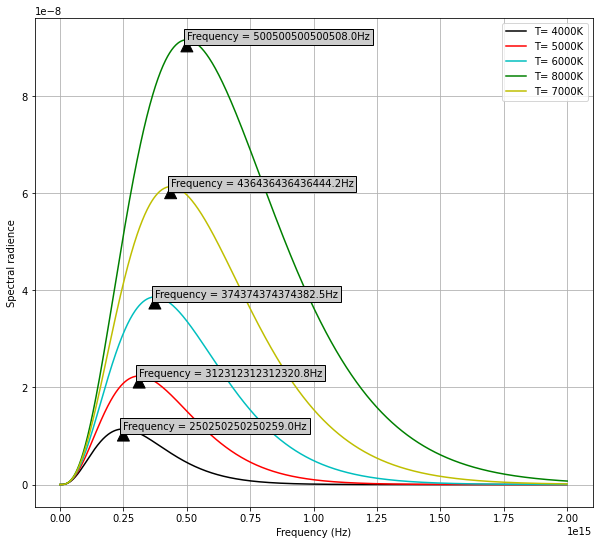

In [88]:
#plots
r = 100
w,l = 1000,900
f, ax = subplots(figsize= (w/r,l/r))


#general plots
plot(freq, I4, c= 'k',label='T= 4000K') #4000K black line
plot(freq, I5, c= 'r',label='T= 5000K') # 5000K red ine
plot(freq, I6, c= 'c',label='T= 6000K') # 6000K cyan line
plot(freq, I8, c= 'g',label='T= 8000K')
plot(freq, I7, c= 'y',label='T= 7000K')
#peak Frequencies
bbox = dict(boxstyle ="square", fc ="0.8")
arrowprops=dict(facecolor='black', shrink=0.05)

annotate("Frequency = %.1fHz"%float(f4m), xy=(f4m, p4m), xytext=(f4m,p4m),bbox = bbox,arrowprops=arrowprops,)
annotate("Frequency = %.1fHz"%float(f5m), xy=(f5m, p5m), xytext=(f5m,p5m),bbox = bbox,arrowprops=arrowprops,)
annotate("Frequency = %.1fHz"%float(f6m), xy=(f6m, p6m), xytext=(f6m,p6m),arrowprops=arrowprops,bbox = bbox)
annotate("Frequency = %.1fHz"%float(f8m), xy=(f8m, p8m), xytext=(f8m,p8m),bbox = bbox,arrowprops=arrowprops,)
annotate("Frequency = %.1fHz"%float(f7m), xy=(f7m, p7m), xytext=(f7m,p7m),bbox = bbox,arrowprops=arrowprops,)
#labels
xlabel('Frequency (Hz)')
ylabel('Spectral radience')
grid(True)
legend()
show()